In [54]:
''' 
Nhắc lại: Các bước xây dựng mô hình trong Machine Learning
B1: Xác định bài toán
B2: Xác định input và output
B3: Xác định mô hình sử dụng
B4: Chia tập dữ liệu ra thành 2 phần: training và testing theo tỉ lệ 80% và 20%
B5: Huấn luyện mô hình trên tập training
B6: Đánh giá mô hình: 
- Trên tập training
- Trên tập test
'''

' \nNhắc lại: Các bước xây dựng mô hình trong Machine Learning\nB1: Xác định bài toán\nB2: Xác định input và output\nB3: Xác định mô hình sử dụng\nB4: Chia tập dữ liệu ra thành 2 phần: training và testing theo tỉ lệ 80% và 20%\nB5: Huấn luyện mô hình trên tập training\nB6: Đánh giá mô hình: \n- Trên tập training\n- Trên tập test\n'

In [55]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [56]:
df = pd.read_csv('dulieuxettuyendaihoc.csv',header =0, delimiter =',', encoding ='utf-8')
df

,MSSV,T1,T2,T3,T4,T5,T6,GT,DT,KV,NGONNGU,TOANLOGICPHANTICH,GIAIQUYETVANDE,KT,NGAYTHI,DINHHUONGNGHENGHIEP
0,SV001,7.2,8.4,7.4,7.2,7.4,6.9,F,NaN,2NT,3.25,3.25,4.50,A1,12/7/2018,No
1,SV002,5.4,6.3,4.3,4.9,3.0,4.0,M,NaN,1,6.00,4.00,3.50,C,12/7/2018,Yes
2,SV003,5.6,5.0,2.8,6.1,4.8,5.7,M,NaN,1,5.00,6.75,4.00,C,12/7/2018,No
3,SV004,6.6,5.1,5.9,4.1,6.1,7.4,M,NaN,1,4.25,4.25,5.25,D1,12/7/2018,No
4,SV005,6.0,5.4,7.6,4.4,6.8,8.0,M,NaN,2NT,4.25,4.50,5.00,A,12/7/2018,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,SV0096,8.6,8.9,7.7,6.7,7.9,6.6,F,NaN,1,5.25,1.50,6.25,C,7/20/2022,Yes
96,SV0097,3.7,4.1,3.1,3.4,5.5,5.7,F,NaN,1,5.25,3.75,4.75,C,7/20/2022,No
97,SV0098,8.8,9.5,9.5,8.5,9.0,8.5,M,NaN,2NT,7.00,8.00,4.00,C,7/20/2022,Yes
98,SV0099,2.7,2.8,6.2,5.2,4.1,4.3,M,NaN,1,5.00,3.50,5.50,C,7/20/2022,No


In [57]:
# Hãy dự áo điểm thi đánh giá năng lực phần NGONNGU dựa trên điểm T5 và T6 sử dụng mô hình hồi quy tuyến tính
# NGONNGU = f(T5,T6) = A0 + A1*T5 + A2*T6 + epsilon
# Với các thiế lập tạo training chiếm 80% và random_state = 16
# Pipline: Input -> Model -> Output

In [58]:
df = df[['T5','T6','NGONNGU']]

In [59]:
x = df[['T5','T6']].values
y = df['NGONNGU'].values

In [60]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size =0.2, random_state =16)

from sklearn.preprocessing import MinMaxScaler
# Scale cho Input
# sc = MinMaxScaler()
# x_train = sc.fit_transform(x_train)

In [61]:
# Xây dựng mô hình hồi quy tuyến tính đa biến
# NGONNGU    T5     T6
# ? = A0 + A1*? + A2*? + epsilon
from sklearn import linear_model

model = linear_model.LinearRegression()
model.fit(x_train,y_train)

# For retrieving the slope (coefficient)
print(model.intercept_)

# Sinh viên tự ghi lại mô hình này
print(model.coef_)

4.012050047743211
[ 0.19517246 -0.23194661]


In [62]:
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler

steps = [
   ('z_score', StandardScaler()),
   ('minmaxnormalize', MinMaxScaler()),
   ('modelLR', LinearRegression())
]

In [63]:
pipe = Pipeline(steps)
pipe

Pipeline(steps=[('z_score', StandardScaler()),
                ('minmaxnormalize', MinMaxScaler()),
                ('modelLR', LinearRegression())])

In [64]:
pipe.fit(x_train,y_train)

Pipeline(steps=[('z_score', StandardScaler()),
                ('minmaxnormalize', MinMaxScaler()),
                ('modelLR', LinearRegression())])

In [65]:

import numpy as np
from sklearn import metrics
y_test_pred = model.predict(x_test)


print('Score or R-Squared: ', 
      pipe.score(x_test, y_test))

print('Mean Absolute Error: ', 
      metrics.mean_absolute_error(y_test, y_test_pred))

print('Mean Squared Error: ', 
      metrics.mean_squared_error(y_test, y_test_pred))

print('Root Mean Squared Error: ', 
      np.sqrt(metrics.mean_squared_error(y_test, y_test_pred))) 

print('Mean Absolute Percentage Error: ', 
      metrics.mean_absolute_percentage_error(y_test, y_test_pred))

Score or R-Squared:  -0.07691460875153755
Mean Absolute Error:  1.1905472933346886
Mean Squared Error:  1.987412256869439
Root Mean Squared Error:  1.4097560983622093
Mean Absolute Percentage Error:  0.38123864099681043


In [66]:
import numpy as np
from sklearn import metrics
y_train_pred = model.predict(x_train)


print('Score or R-Squared: ', 
      pipe.score(x_train, y_train))

print('Mean Absolute Error: ', 
      metrics.mean_absolute_error(y_train, y_train_pred))

print('Mean Squared Error: ', 
      metrics.mean_squared_error(y_train, y_train_pred))

print('Root Mean Squared Error: ', 
      np.sqrt(metrics.mean_squared_error(y_train, y_train_pred))) 

print('Mean Absolute Percentage Error: ', 
      metrics.mean_absolute_percentage_error(y_train, y_train_pred))

Score or R-Squared:  0.01846517069125675
Mean Absolute Error:  1.1471162639928523
Mean Squared Error:  2.0086861063975676
Root Mean Squared Error:  1.4172812375804484
Mean Absolute Percentage Error:  0.3941285255756851


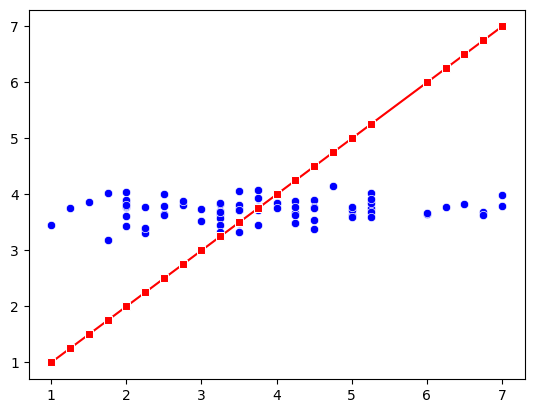

In [68]:
sns.scatterplot(x = y_train.flatten(), y = y_train_pred.flatten(), marker='o', color = 'b')
sns.lineplot(x=y_train.flatten(), y=y_train.flatten(), marker='s', color = 'r')
plt.show()

# cột tung là: y_train_pred
# cot hoành là: y_train

# Điểm sanh là biểu đồ scatterplot
# đường đỏ là biểu đồ line plot
# flatten giúp chuyển về mảng để scatterplot vẽ được

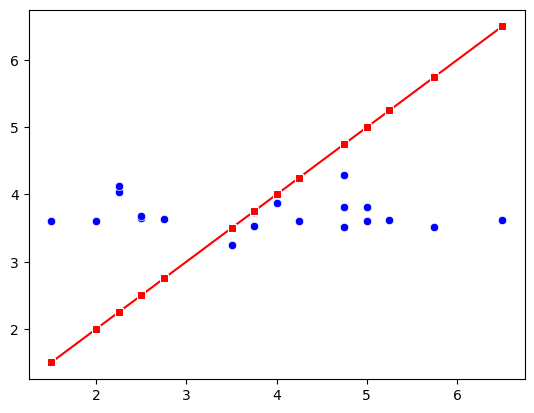

In [69]:
sns.scatterplot(x = y_test.flatten(), y = y_test_pred.flatten(), marker='o', color = 'b')
sns.lineplot(x=y_test.flatten(), y=y_test.flatten(), marker='s', color = 'r')
plt.show()

In [70]:
y_test_pred = model.predict(x_test)
dfTestValidation = pd.DataFrame(list(zip(
   x_test[:,0], 
   x_test[:,1], 
   y_test.flatten(), 
   y_test_pred.flatten()
   )),
   columns = ['T5_test','T6_test','y_test','y_test_pred'])
dfTestValidation['Residual'] = dfTestValidation['y_test'] - dfTestValidation['y_test_pred']
dfTestValidation

,T5_test,T6_test,y_test,y_test_pred,Residual
0,8.5,8.3,3.75,3.745859,0.004141
1,5.8,3.7,4.75,4.285848,0.464152
2,6.8,9.0,3.50,3.251703,0.248297
3,4.0,5.5,5.75,3.517034,2.232966
4,8.6,8.1,4.75,3.811766,0.938234
5,5.3,6.1,2.75,3.631590,-0.881590
6,8.0,6.6,2.25,4.042582,-1.792582
7,5.4,6.6,3.75,3.535134,0.214866
8,7.1,7.7,2.00,3.611786,-1.611786
9,7.5,6.9,4.00,3.875412,0.124588


In [73]:
y_train_pred = model.predict(x_train)
dfTrainValidation = pd.DataFrame(list(zip(
   x_train[:,0], 
   x_train[:,1], 
   y_train.flatten(), 
   y_train_pred.flatten()
   )),
   columns = ['T5_train','T6_train','y_train','y_train_pred'])
dfTrainValidation['Residual'] = dfTrainValidation['y_train'] - dfTrainValidation['y_train_pred']
dfTrainValidation

,T5_train,T6_train,y_train,y_train_pred,Residual
0,5.5,5.7,5.25,3.763403,1.486597
1,8.5,7.8,1.50,3.861832,-2.361832
2,8.9,8.5,6.25,3.777539,2.472461
3,4.9,6.5,1.00,3.460742,-2.460742
4,8.0,7.2,4.50,3.903414,0.596586
...,...,...,...,...,...
75,6.3,8.0,4.50,3.386064,1.113936
76,8.4,8.1,3.75,3.772731,-0.022731
77,5.0,5.1,2.00,3.804985,-1.804985
78,3.5,5.6,2.25,3.396253,-1.146253


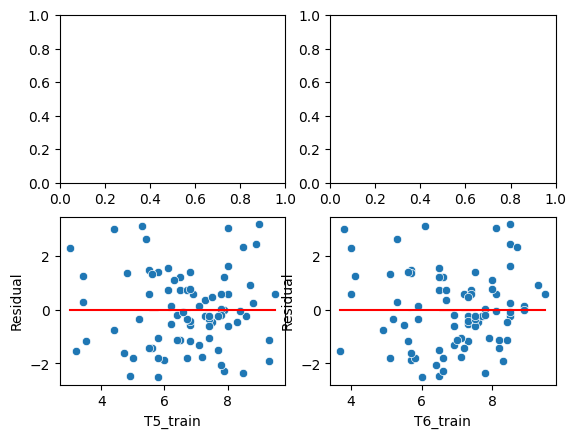

In [75]:
fig, axes = plt.subplots(2,2)
sns.scatterplot(data= dfTrainValidation, x='T5_train', y='Residual', ax=axes[1,0])
sns.lineplot(data= dfTrainValidation, x='T5_train', y=[0]*len(dfTrainValidation), color='r', ax=axes[1,0])

sns.scatterplot(data=dfTrainValidation, x='T6_train', y='Residual', ax=axes[1,1])
sns.lineplot(data= dfTrainValidation, x='T6_train', y=[0]*len(dfTrainValidation), color='r', ax=axes[1,1])
plt.show()

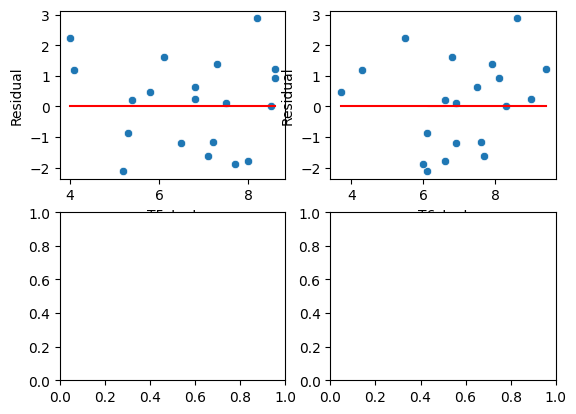

In [82]:
fig, axes = plt.subplots(2,2)
sns.scatterplot(data= dfTestValidation, x='T5_test', y='Residual', ax=axes[0,0])
sns.lineplot(data= dfTestValidation, x='T5_test', y=[0]*len(dfTestValidation), color='r', ax=axes[0,0])

sns.scatterplot(data= dfTestValidation, x='T6_test', y='Residual', ax=axes[0,1])
sns.lineplot(data= dfTestValidation, x='T6_test', y=[0]*len(dfTestValidation), color='r', ax=axes[0,1])

plt.show()

# ax=axes[1,0]
#1: là dòng, 0 là cột (Dòng trược cột sau)

# KẾT LUẬN: T5 và T6 không phù hợp 

<h2 style="color: green">Cách 4: Dùng histogram plot để đánh giá</h2>

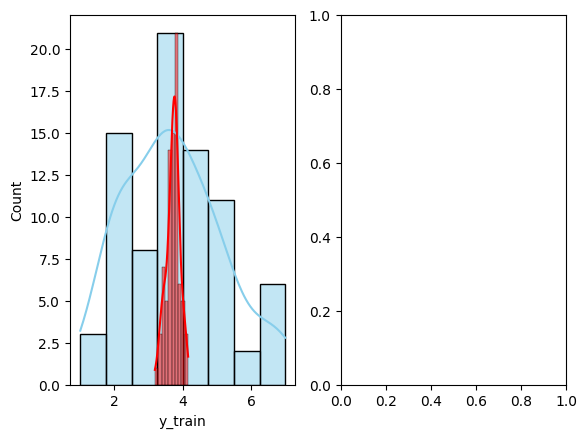

In [83]:
fig, axes = plt.subplots(1,2)
sns.histplot(data=dfTrainValidation, x='y_train', color='skyblue',
             label='Actual', kde=True, ax=axes[0])
sns.histplot(data=dfTrainValidation, x='y_train_pred', color='red',
             label='Forecast', kde=True, ax=axes[0])
plt.show()

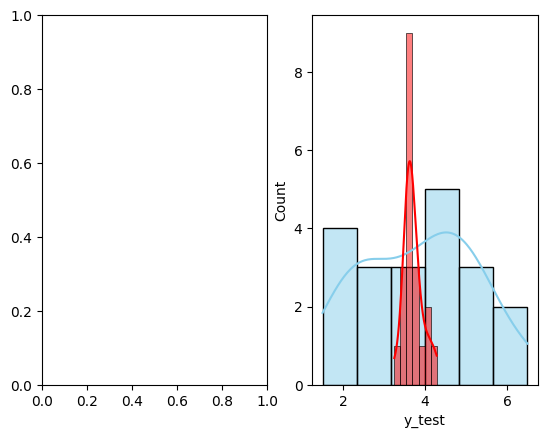

In [84]:
fig, axes = plt.subplots(1,2)
sns.histplot(data=dfTestValidation, x='y_test', color='skyblue',
             label='Actual', kde=True, ax=axes[1])
sns.histplot(data=dfTestValidation, x='y_test_pred', color='red',
             label='Forecast', kde=True, ax=axes[1])

plt.show()
# Đường màu đỏ là phân phối giá trị dự báo
# Đường màu xanh là phân phối giá trị thực tế

# từ đỉnh chiếu xuống lấy khoảng phần tử nào xảy ra nhìu nhất. VD cao nhất 20 -> 3.8

In [ ]:
'''
Fitting.

Bias là sai số trong mô hình (Giữa thực tế và dự báo)
Bias cao => mô hình k tốt và cái này được gọi là Underfiting (Lỗi cao/Lỗi xấu)
Bias thấp => mô hình tốt :
-Tốt tiêu cực: học hết mọi thứ đang xảy ra trong dlieu, khớp(học) tới mức các TH đặc biệt, dẫn đến k có khả năng suy nghĩ cái mới
-Tốt tích cực: Rút trích ra được cốt lỗi, từ đó có thể suy diễn ra khi đưa 1 dlieu mới.
'''